In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [171]:
train = pd.read_csv("C:/Users/mukul/Downloads/train_data.csv")

In [172]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [174]:
#the missing values for each variables
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [175]:
#mode used to fill null values of Area and city as it is a categorical variable
train['Health Indicator'] = train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].mode()[0])


In [176]:
#train.isnull().sum()

In [177]:
#null values imputed with median for avoiding biases generated from presence of outliers
train.fillna(train.median(), inplace=True)

In [178]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [179]:
def outlier_treatement(input_demo, features):
    
    for fe in features:
        
        #CLIPPING MonthlyIncome and finding outliers
        Q1 = input_demo[fe].quantile(.25)
        Q3 = input_demo[fe].quantile(.75)
        Q_10 = input_demo[fe].quantile(0.1)
        Q_90 = input_demo[fe].quantile(0.9)

        IQR = Q3-Q1

        low_lim = Q1 - (IQR*1.5)
        high_lim = Q3 + (IQR*1.5)
        print(Q_10, Q_90)
        input_demo[fe+"___OUTLIERS"] = input_demo[fe].apply(lambda x: x<low_lim and x>high_lim)
#         input_demo[fe] = input_demo[fe].clip(Q_10, Q_90)
    
    return input_demo


def create_bin_features(input_df, features):
    for bin_fe in features:
        print("Binning: ",bin_fe)
        input_df[bin_fe+"___BINS"] = pd.qcut(input_df[bin_fe], 10, labels=False, duplicates='drop')
    
    return input_df

In [180]:
#Labeling the train data
X= train.drop(columns = ['Response'])
Y= train['Response']


In [181]:
#Treating the categorical variables by assigning numeric values to each categories within the same variable using Label Encoding
object_cols = list(X.select_dtypes(['object']).columns)

from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_train1 = X.copy()
from collections import defaultdict 

labelencoder = defaultdict(list) 
# Apply label encoder to each column with categorical data
for col in object_cols:
    label_encoder = LabelEncoder()
    labelencoder[col]= label_encoder
    print(col)
    label_train1[col] = label_encoder.fit_transform(X[col])

    
# label_train1

City_Code
Accomodation_Type
Reco_Insurance_Type
Is_Spouse
Health Indicator
Holding_Policy_Duration


In [182]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
50877    0
50878    0
50879    0
50880    1
50881    0
Name: Response, Length: 50882, dtype: int64

In [183]:
label_train1

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1,22,3213,1,0,36,36,0,0,5,3.0,22,11628.0
1,2,31,1117,0,1,75,22,0,1,0,3.0,22,30510.0
2,3,31,3732,0,0,32,32,0,0,0,1.0,19,7450.0
3,4,16,4378,0,1,52,48,0,0,5,3.0,19,17780.0
4,5,34,2190,1,0,44,44,0,1,8,1.0,16,10404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,30,845,1,0,22,22,0,2,0,3.0,18,7704.0
50878,50879,31,4188,1,0,27,27,0,2,12,3.0,4,5408.0
50879,50880,0,442,1,0,63,63,0,1,5,1.0,12,11374.0
50880,50881,0,4,0,1,71,49,0,1,7,2.0,16,28179.2


In [184]:
label_train1.describe()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,14.974981,1732.788707,0.450670,0.203333,44.856275,42.738866,0.165520,1.112751,4.133171,2.662415,15.115188,14183.950069
std,14688.512535,12.147432,1424.081652,0.497566,0.402482,17.310271,17.319375,0.371653,1.406159,4.601652,0.841994,6.340663,6590.074873
min,1.000000,0.000000,1.000000,0.000000,0.000000,18.000000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2280.000000
25%,12721.250000,4.000000,523.000000,0.000000,0.000000,28.000000,27.000000,0.000000,0.000000,0.000000,2.000000,12.000000,9248.000000
50%,25441.500000,11.000000,1391.000000,0.000000,0.000000,44.000000,40.000000,0.000000,1.000000,1.000000,3.000000,17.000000,13178.000000
75%,38161.750000,30.000000,2667.000000,1.000000,0.000000,59.000000,57.000000,0.000000,2.000000,8.000000,3.000000,20.000000,18096.000000
max,50882.000000,35.000000,6194.000000,1.000000,1.000000,75.000000,75.000000,1.000000,8.000000,14.000000,4.000000,22.000000,43350.400000


In [185]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y1 = le.fit_transform(Y)

In [186]:
Y1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

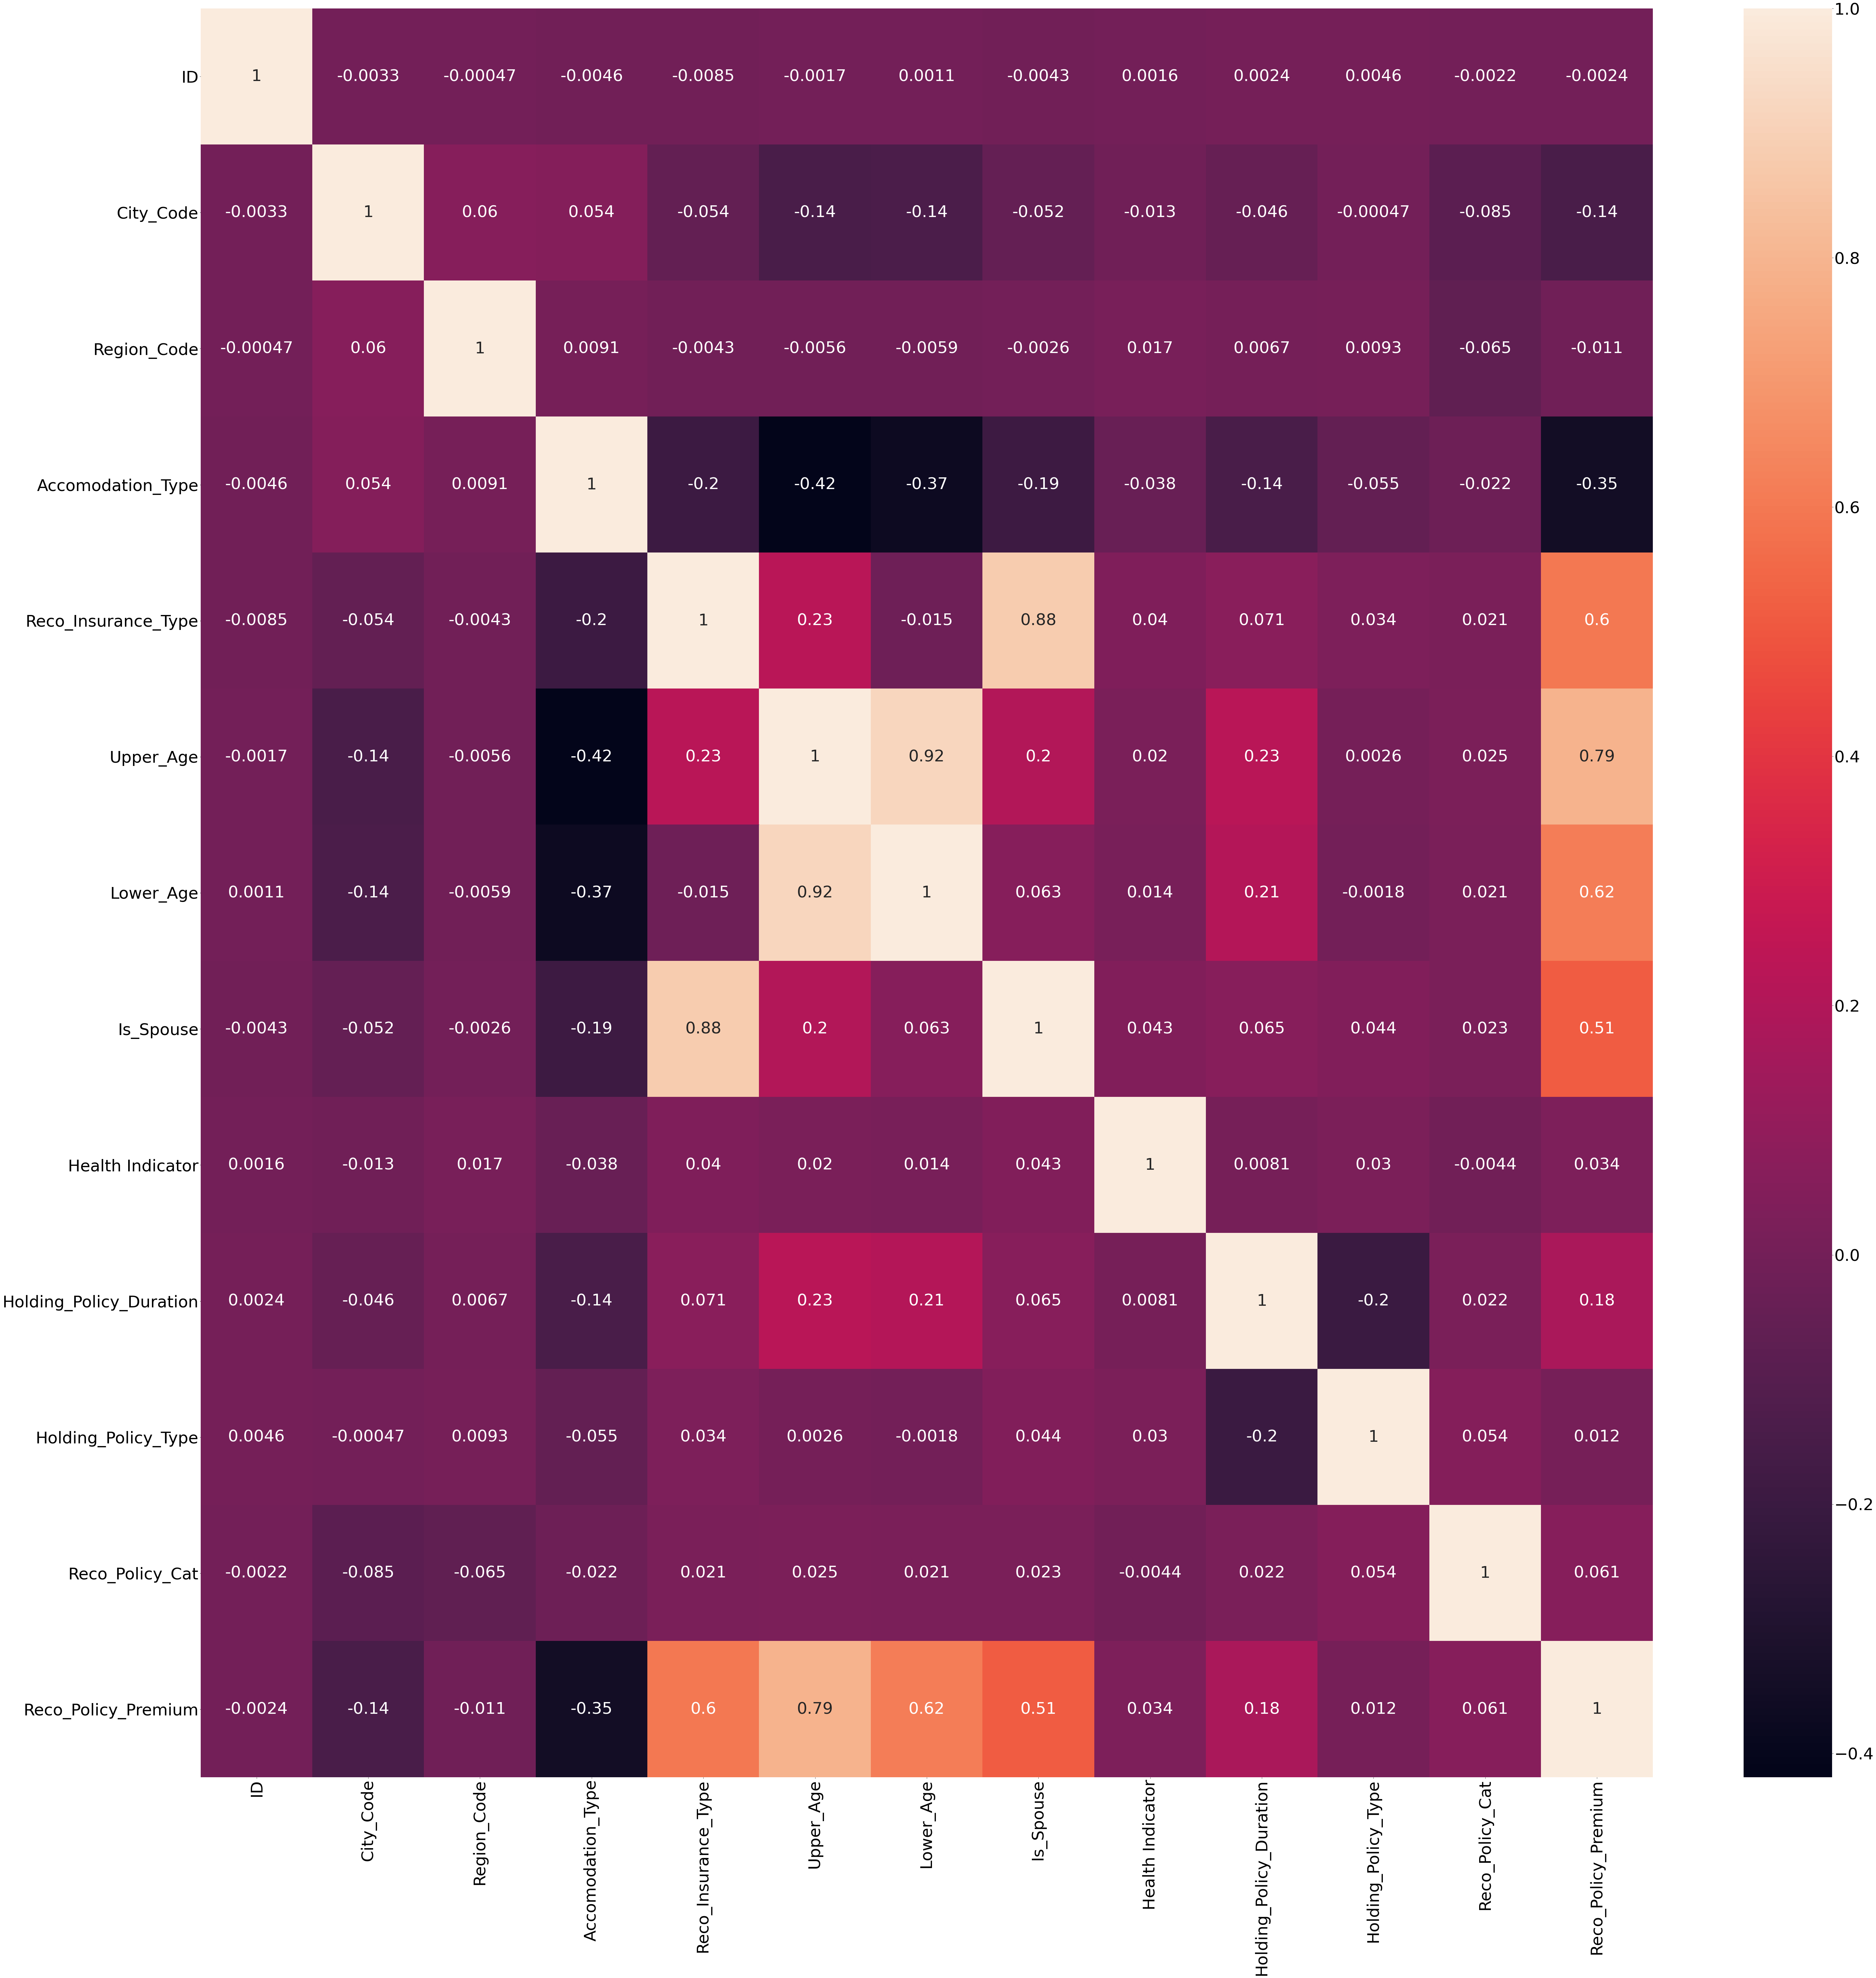

In [187]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})
corr_matrix = label_train1.corr()
plt.figure(figsize = (100,100))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [188]:
label_train1.drop('Upper_Age', axis = 1, inplace = True)

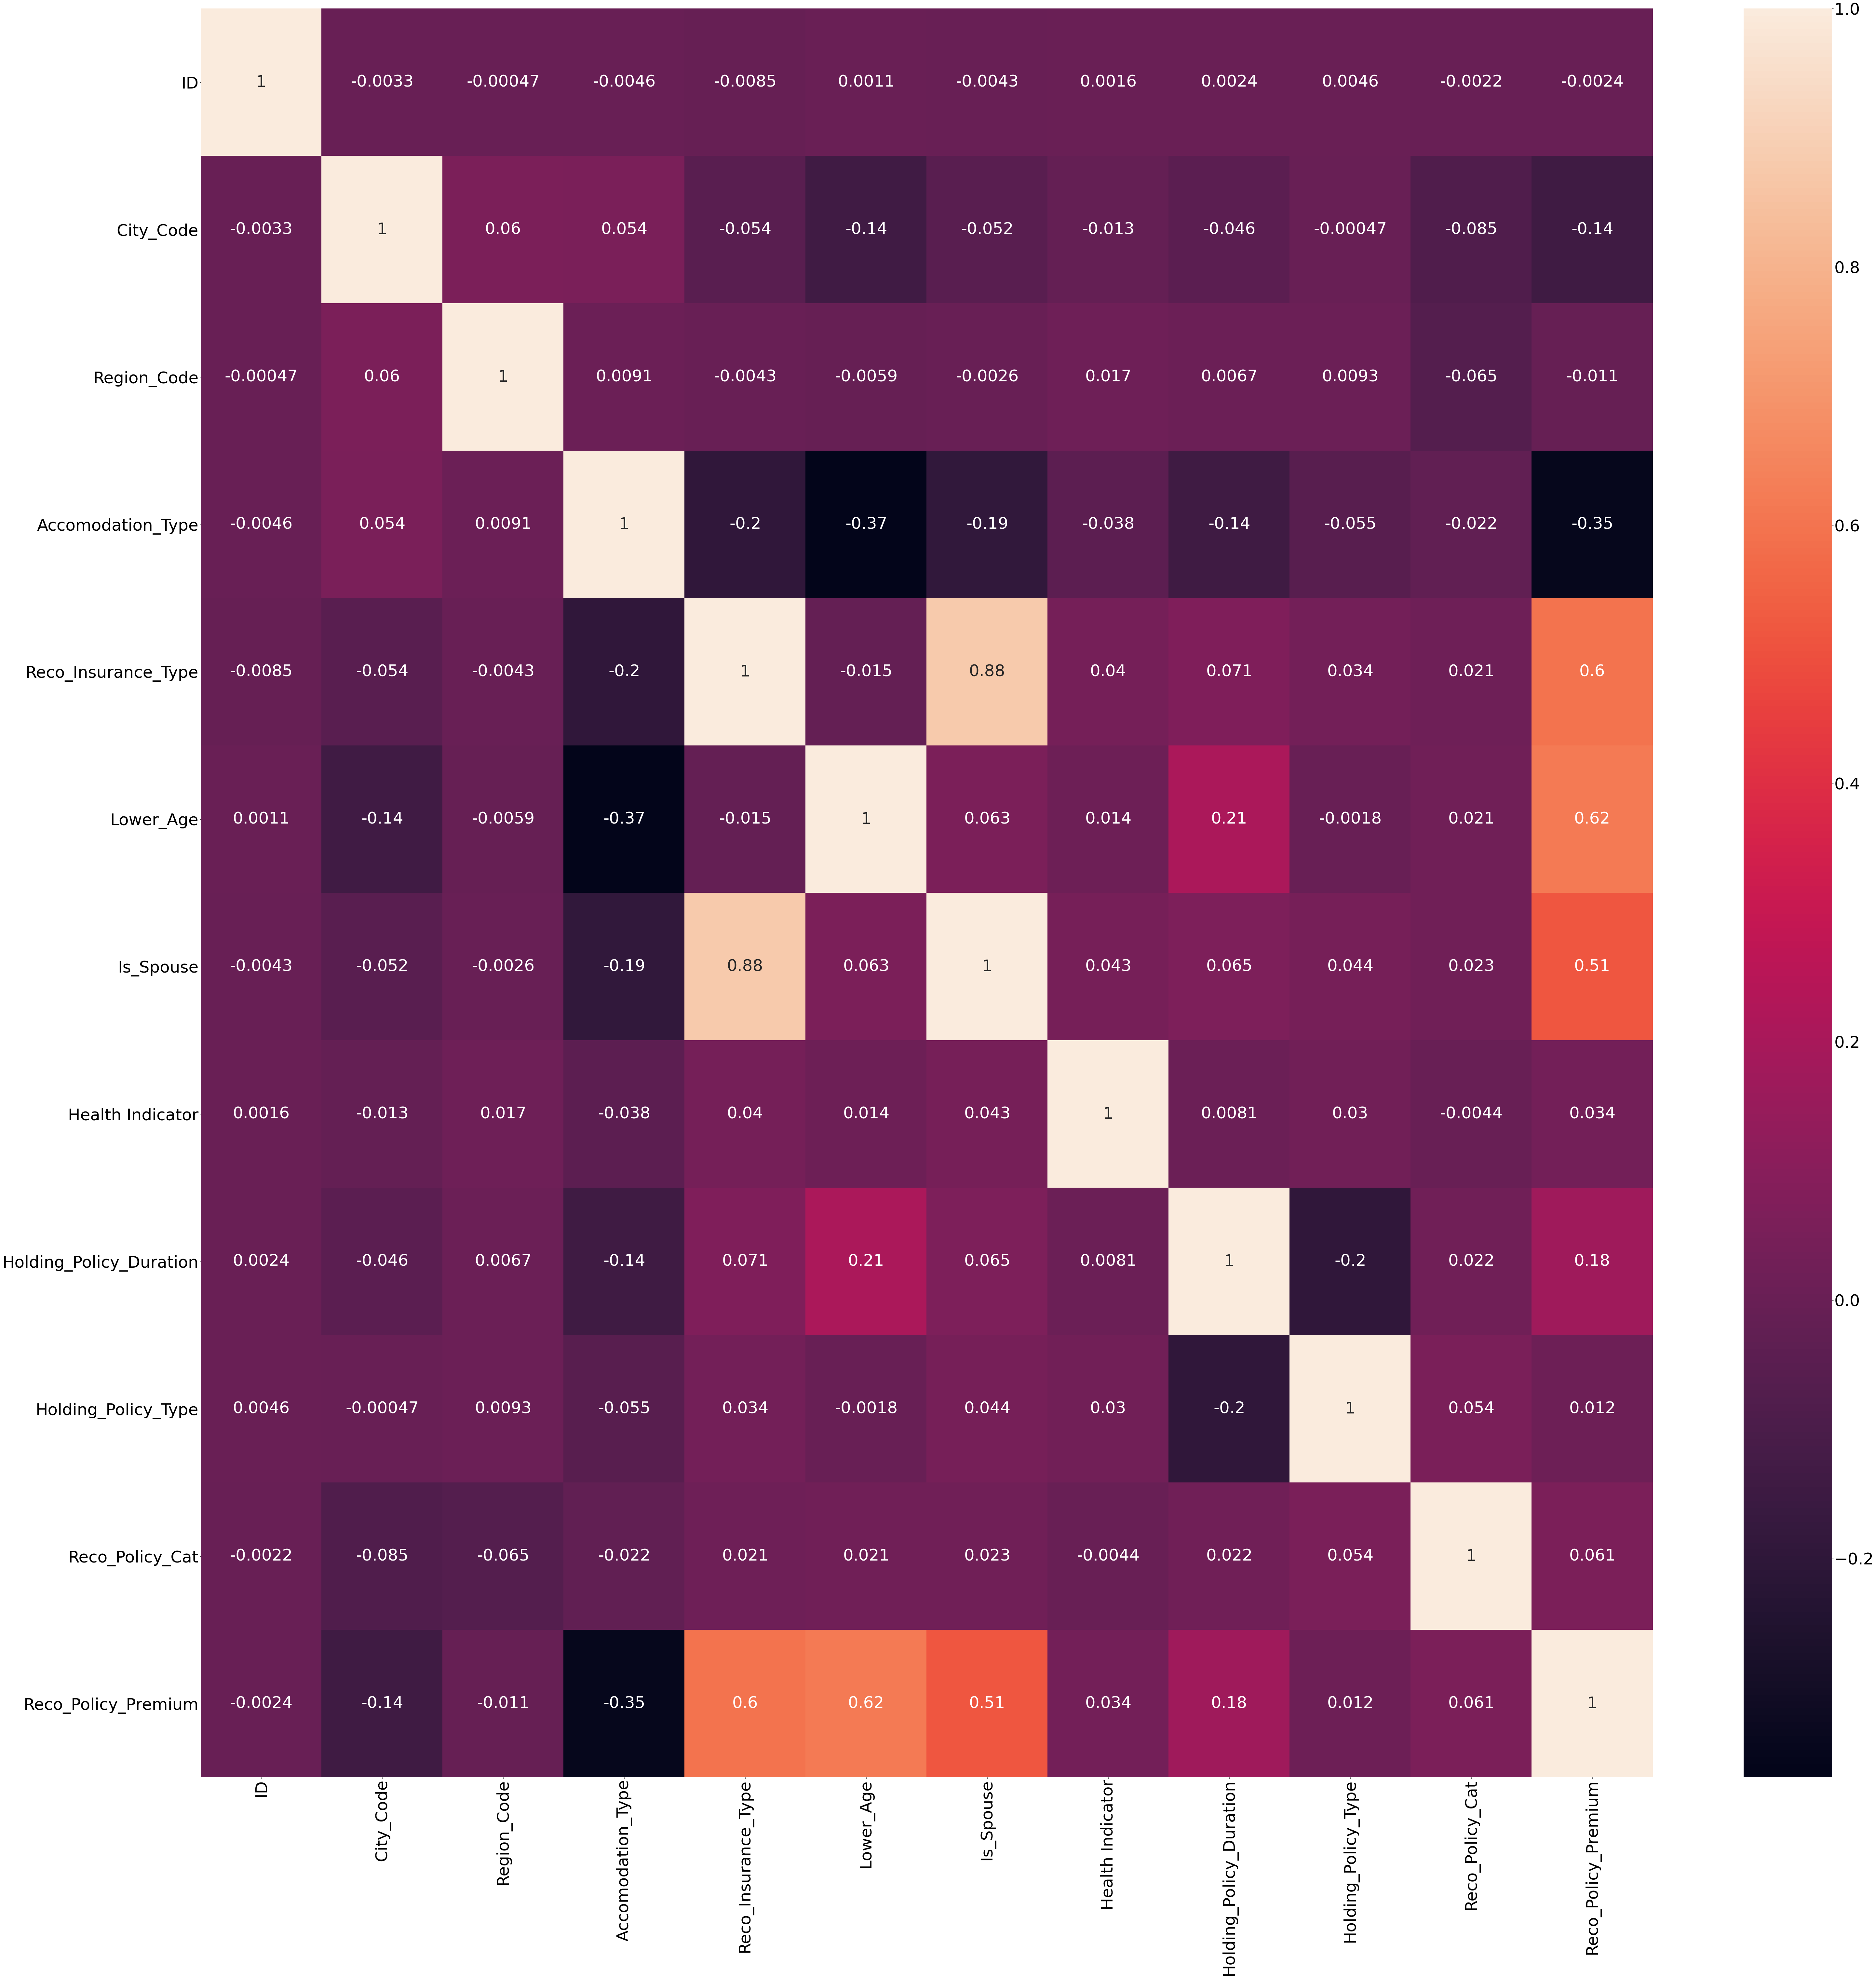

In [189]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})
corr_matrix = label_train1.corr()
plt.figure(figsize = (100,100))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [190]:
label_train1.drop('Is_Spouse', axis = 1, inplace = True)

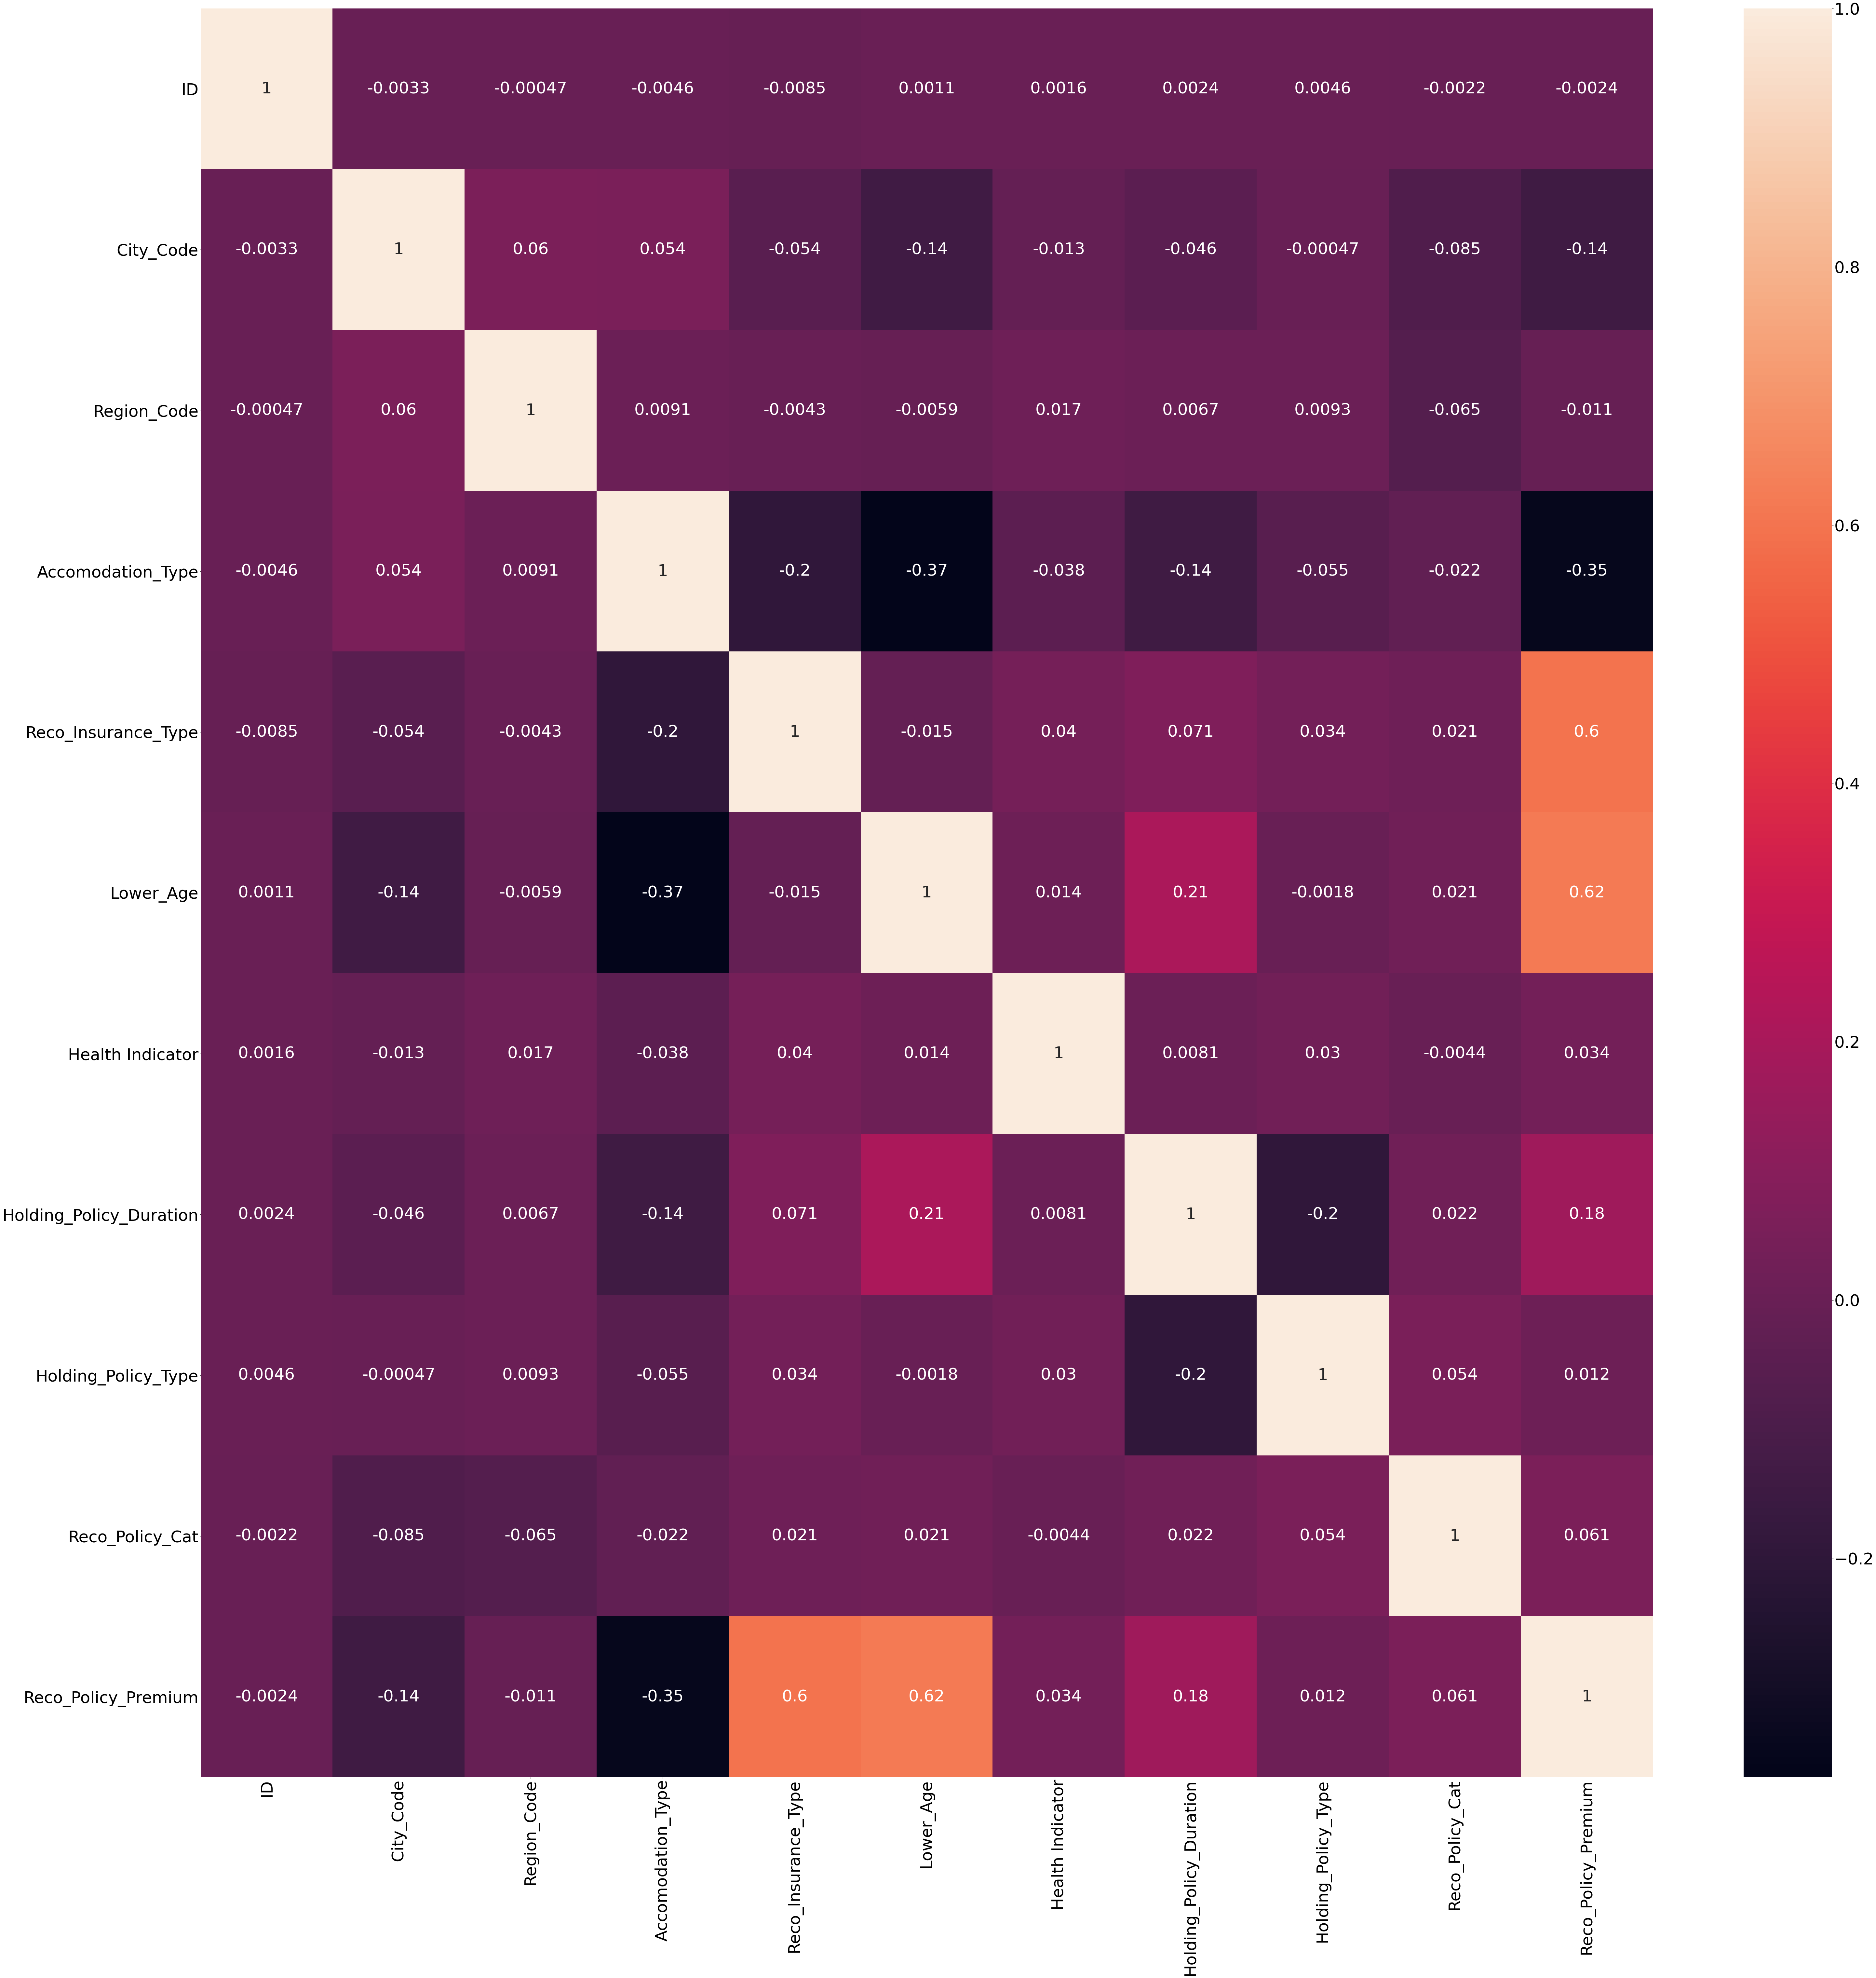

In [191]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})
corr_matrix = label_train1.corr()
plt.figure(figsize = (100,100))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [192]:
#drop Id
label_train1.drop('ID', axis = 1, inplace = True)

In [193]:
Y1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [194]:
label_train1

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,22,3213,1,0,36,0,5,3.0,22,11628.0
1,31,1117,0,1,22,1,0,3.0,22,30510.0
2,31,3732,0,0,32,0,0,1.0,19,7450.0
3,16,4378,0,1,48,0,5,3.0,19,17780.0
4,34,2190,1,0,44,1,8,1.0,16,10404.0
...,...,...,...,...,...,...,...,...,...,...
50877,30,845,1,0,22,2,0,3.0,18,7704.0
50878,31,4188,1,0,27,2,12,3.0,4,5408.0
50879,0,442,1,0,63,1,5,1.0,12,11374.0
50880,0,4,0,1,49,1,7,2.0,16,28179.2


In [195]:
#Y

In [196]:
test = pd.read_csv("C:/Users/mukul/Downloads/test_data.csv")

In [197]:
test

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [198]:
#dropping extra variables
test.drop('Is_Spouse', axis = 1, inplace = True)
test.drop('Upper_Age', axis = 1, inplace = True)


In [199]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Lower_Age                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [200]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Lower_Age                21805 non-null  int64  
 6   Health Indicator         16778 non-null  object 
 7   Holding_Policy_Duration  13202 non-null  object 
 8   Holding_Policy_Type      13202 non-null  float64
 9   Reco_Policy_Cat          21805 non-null  int64  
 10  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 1.8+ MB


In [201]:
#mode used to fill null values of categorical variable
test['Health Indicator'] = test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].mode()[0])


In [202]:
test.fillna(test.median(), inplace=True)

In [203]:
test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Lower_Age                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [204]:
#Treating the categorical variables by assigning numeric values to each categories within the same variable using Label Encoding
object_cols = list(test.select_dtypes(['object']).columns)

from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_test1 = test.copy()
from collections import defaultdict 

labelencoder = defaultdict(list) 
# Apply label encoder to each column with categorical data
for col in object_cols:
    label_encoder = LabelEncoder()
    labelencoder[col]= label_encoder
    print(col)
    label_test1[col] = label_encoder.fit_transform(test[col])

    
label_test1

City_Code
Accomodation_Type
Reco_Insurance_Type
Health Indicator
Holding_Policy_Duration


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,0,156,0,0,30,0,11,3.0,5,11934.0
1,50884,30,7,0,1,68,0,8,3.0,18,32204.8
2,50885,0,564,1,0,28,2,7,4.0,17,9240.0
3,50886,22,1177,1,0,23,2,8,3.0,18,9086.0
4,50887,0,951,0,0,75,2,5,3.0,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,22,1044,0,0,45,0,9,1.0,18,15884.0
21801,72684,30,266,0,0,59,4,11,3.0,18,21390.0
21802,72685,3,2470,0,0,74,2,5,3.0,1,17836.0
21803,72686,1,1676,1,0,25,3,8,1.0,19,11568.0


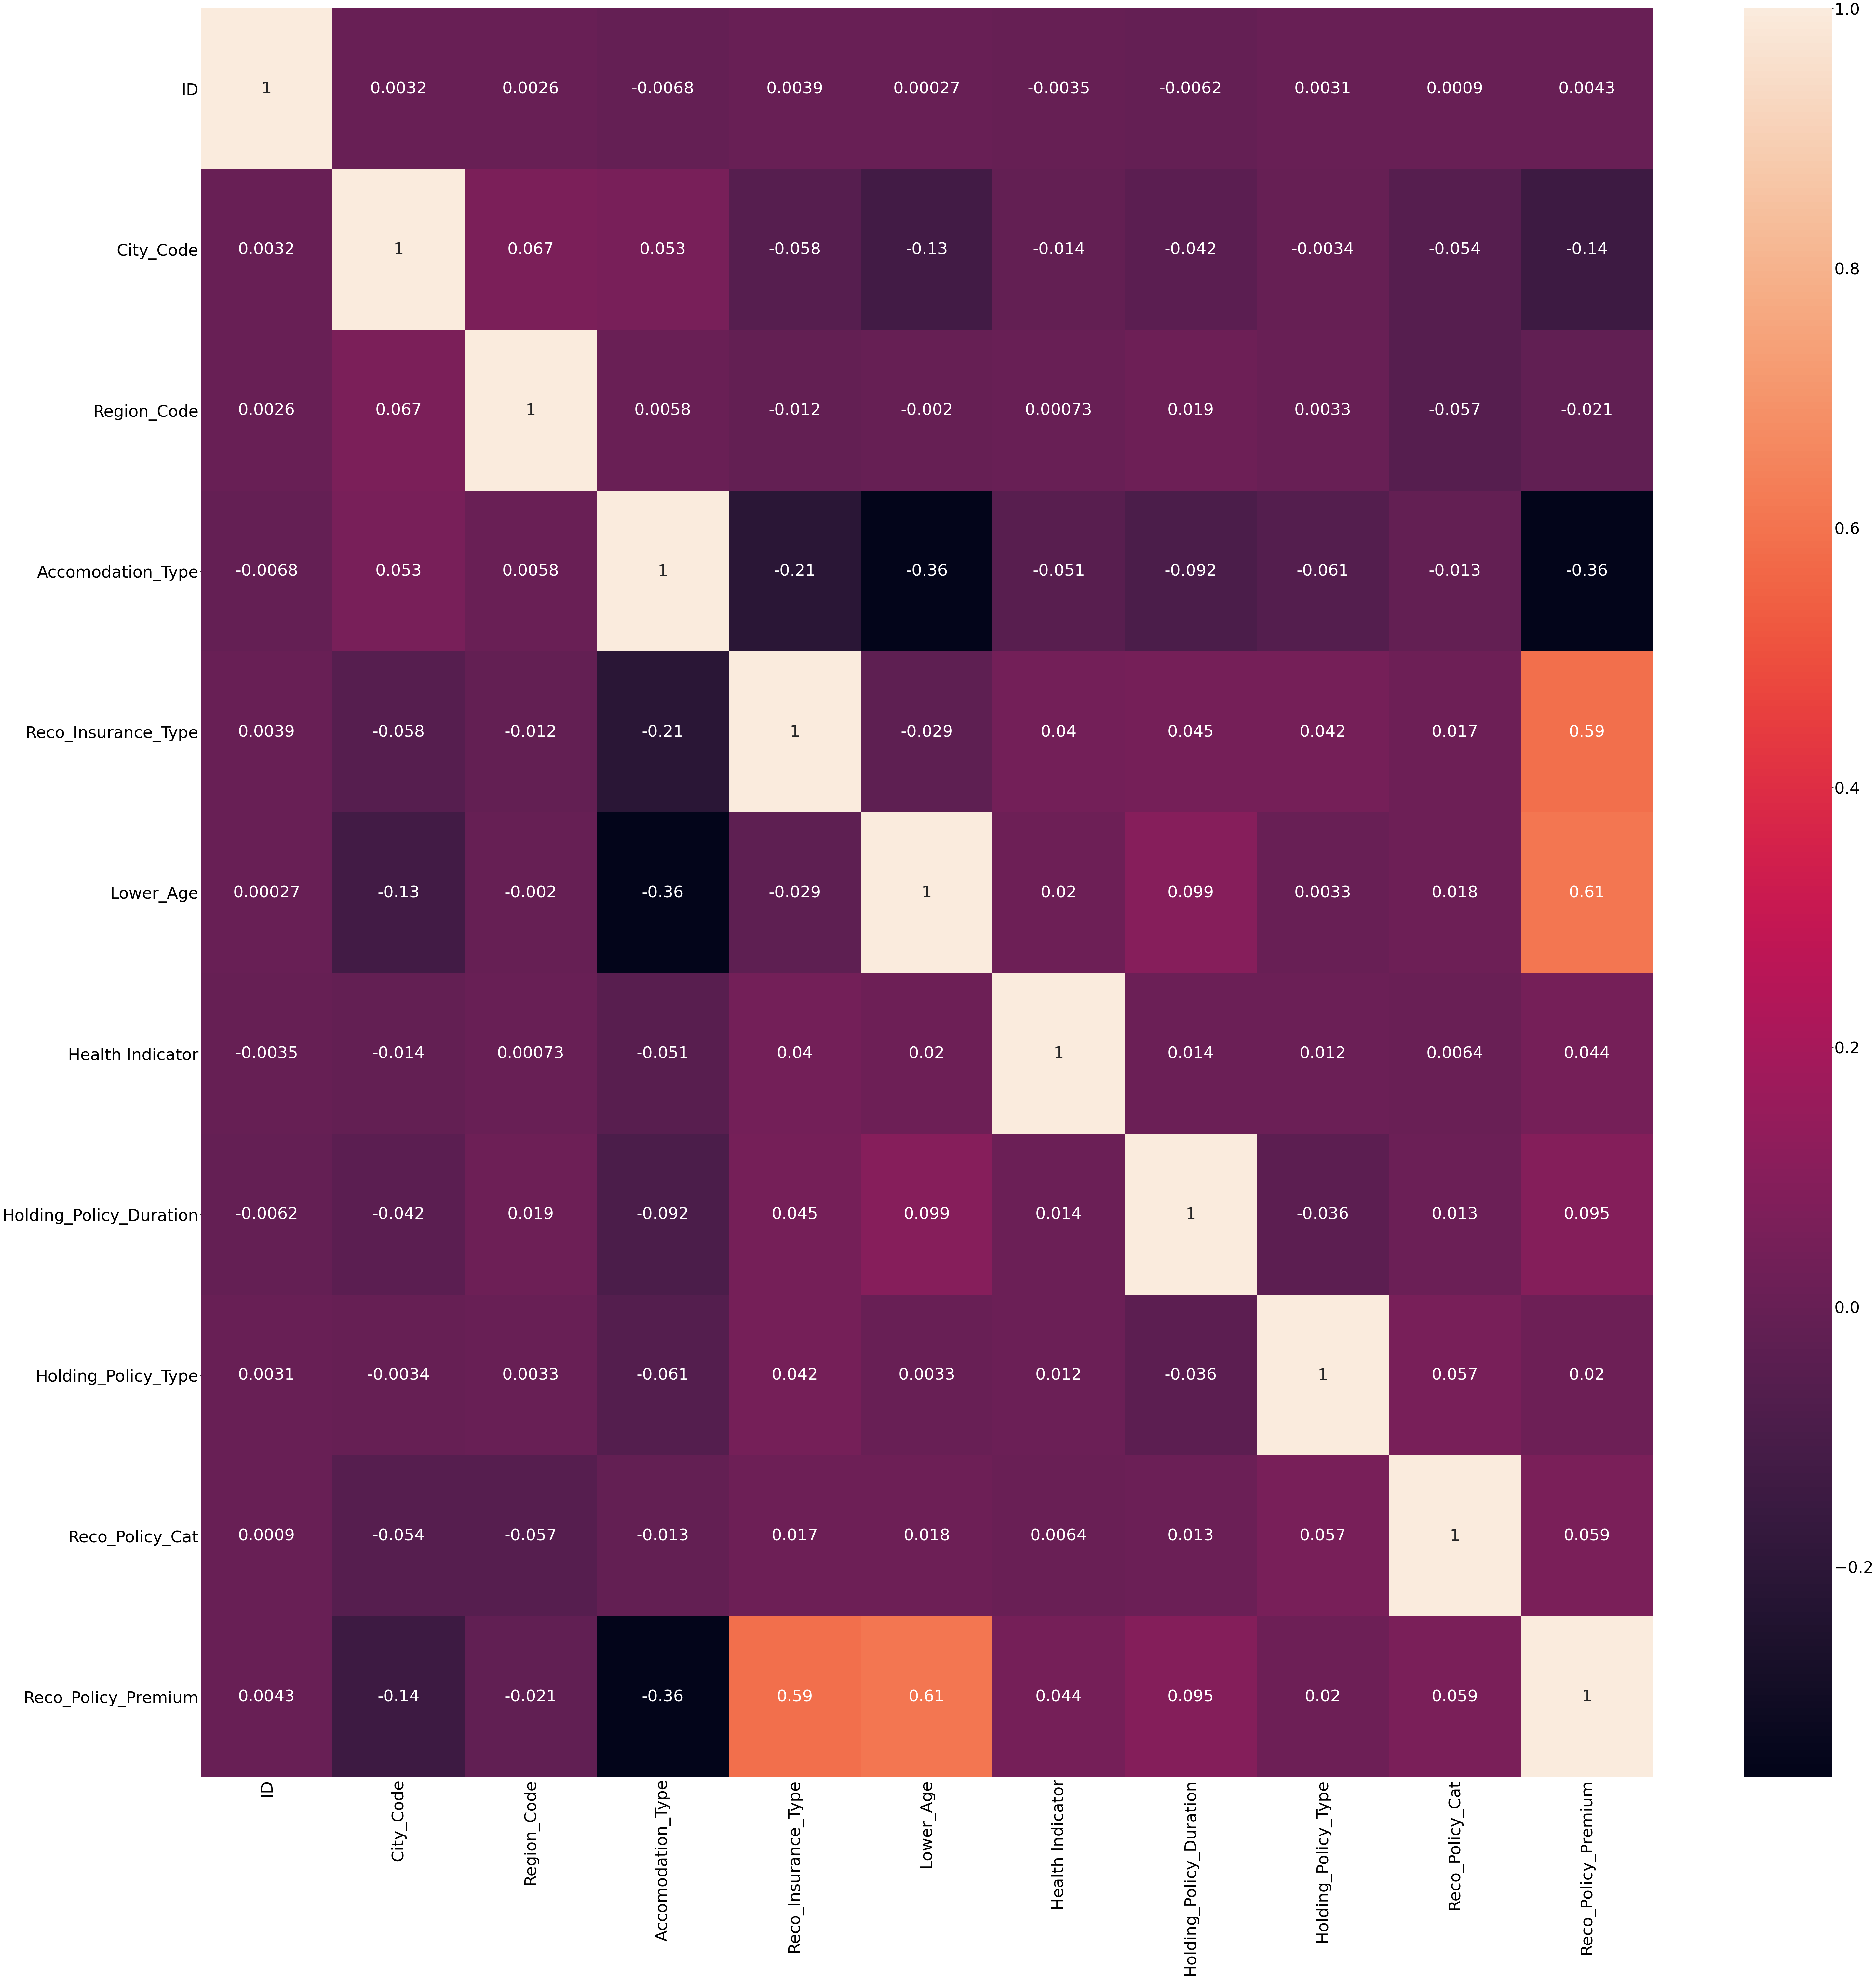

In [205]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})
corr_matrix = label_test1.corr()
plt.figure(figsize = (100,100))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [206]:
label_test1.drop('ID', axis = 1, inplace = True)

In [207]:
X1 = label_test1
X1.shape
X_1= np.array(X1)

In [208]:
X1.shape

(21805, 10)

In [1]:
# importing all the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split,KFold,StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

NameError: name 'pd' is not defined

In [ ]:
# splitting the train dataset to training and validation data sets 
X_train, X_valid, Y_train, Y_valid = train_test_split(label_train1,Y1, test_size=0.3, random_state=0)

In [273]:
#import lightgbm as lgb
#d_train = lgb.Dataset(X_train, label=Y_train)
#params = {}
#params['learning_rate'] = 0.025
#params['bagging_fraction']= 0.9648178267940851
#params['bagging_freq'] = 5
#params['n_estimators']=20000
#params['random_state']=18121995
#params['lambda_l1'] = 0.05
#params['lambda_l2'] = 3.3000000000000003
#params['boosting_type'] = 'gbdt'
#params['objective'] = 'binary'
#params['metric'] = 'binary_logloss'
#params['feature_fraction']= 0.7864711972326701
#params['num_leaves'] = 21
#params['min_data'] = 92
#params['max_depth'] = 11
#params['verbose'] = -1
#clf = lgb.train(params, d_train, 100)

In [ ]:
# def catboost_model():
    
    x,y,x_test,cat_features=savedata()
     
    err = [] 

    oofs = np.zeros(shape=(len(x)))
    preds = np.zeros(shape=(len(x_test)))

    Folds=8

    fold = StratifiedKFold(n_splits=Folds, shuffle=True, random_state=2020)
    i = 1

    for train_index, test_index in fold.split(x, y):
        x_train, x_val = x.iloc[train_index], x.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
        m =  CatBoostClassifier(n_estimators=10000,random_state=2020,eval_metric='AUC')
    
        m.fit(x_train, y_train,eval_set=[(x_val, y_val)], early_stopping_rounds=30,verbose=100,cat_features=cat_features)
    
        pred_y = m.predict_proba(x_val)[:,1]
        oofs[test_index] = pred_y
        print(i, " err_cat: ", roc_auc_score(y_val,pred_y))
        err.append(roc_auc_score(y_val,pred_y))
        preds+= m.predict_proba(x_test)[:,1]
        i = i + 1
    preds=preds/Folds
    
    print(f"Average StratifiedKFold Score : {sum(err)/Folds} ")
    oof_score = roc_auc_score(y, oofs)
    print(f'\nOOF Auc is : {oof_score}')
    
    oofs=pd.DataFrame(oofs,columns=['catboostoof'])
    preds=pd.DataFrame(preds,columns=['catboostpred'])
    
    oofs.to_csv('catboostoof.csv',index=False)
    preds.to_csv('catboostpred.csv',index=False)

In [274]:
#Prediction
y_pred=clf1.predict(label_test1)
#convert into binary values
for i in range(0,99):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [275]:
y_pred

array([0.        , 0.        , 1.        , ..., 0.01852749, 0.13266653,
       0.01569123])

In [276]:
#clf2 = LogisticRegression(solver= 'newton-cg',multi_class='multinomial',max_iter = 900)
#clf2.fit(X_train,Y_train)

In [277]:
#RANDOM_SEED = 0
#clf1 = RandomForestClassifier( n_estimators = 30,criterion='entropy',min_samples_split=10, max_depth = 15,n_jobs=10,random_state=RANDOM_SEED)
#clf1.fit(X_train, Y_train)

In [278]:
#clf3 =  XGBRFClassifier(n_estimators=1000,max_depth=15,learning_rate=0.1,subsample=0.8,colsample_bytree=0.6,gamma=0, reg_alpha=0.05, reg_lambda=0.9)
#clf3.fit(X_train, Y_train)

In [279]:
#pred=clf1.predict(label_test1)

In [280]:
output = pd.DataFrame({'ID':test['ID'],'Response':y_pred})
output.to_csv('h_a1.csv', index=False)